In [2]:
#Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.utils import resample

In [3]:
#Reading the data

df = pd.read_csv('C:/Users/USER/Desktop/data science AFRICDSA/Datasets/default+of+credit+card+clients/default of credit card clients.csv', header = 1, sep = ',')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Replacing the default payment next month column to default

df.rename(columns = {'default payment next month':'DEFAULT'}, inplace = True)
for i in df.columns:
    print(i)

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
DEFAULT


In [5]:
#Dropping the ID column

df.drop('ID', axis = 1, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
#Identifying unique values in each columns

for i in df.columns:
    print(i,df[i].unique())

LIMIT_BAL [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
AGE [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2 

For marriage and education, there are missing values that have been denoted with 0. It needs to be cleaned.


In [9]:
#Identifying missing data

df[['MARRIAGE','EDUCATION']] = df[['MARRIAGE','EDUCATION']].replace(0, np.NaN)
df[['MARRIAGE','EDUCATION']].isna().sum()

MARRIAGE     54
EDUCATION    14
dtype: int64

The two columns have some missing data that needs to be worked on. I will replace them with the mode

In [10]:
#Getting the mode of the marriage column

df['MARRIAGE'].mode()

0    2.0
Name: MARRIAGE, dtype: float64

In [11]:
#Filling the Nulls in marriage column with its mode

df['MARRIAGE'].fillna(df['MARRIAGE'].mode()[0], inplace=True)
df['MARRIAGE'].isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_15556\1745566511.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MARRIAGE'].fillna(df['MARRIAGE'].mode()[0], inplace=True)


0

In [12]:
#Getting the mode of the EDUCATION column

df['EDUCATION'].mode()

0    2.0
Name: EDUCATION, dtype: float64

In [13]:
#Filling the Nulls in Education column with its mode

df['EDUCATION'].fillna(df['EDUCATION'].mode()[0], inplace=True)
df['EDUCATION'].isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_15556\2182992765.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EDUCATION'].fillna(df['EDUCATION'].mode()[0], inplace=True)


0

In [14]:
#Checking if there are any nulls

df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

No nulls in the dataset

### Downsampling the data

In [15]:
#Number of rows in the dataset

len(df)

30000

In [16]:
#Converting the number of rows from 30000 to 2000 each since SVM works best with small data samples

#Creating new variables for defaulters and non-defaulters
defaulters = df[df['DEFAULT'] == 0]
non_defaulters = df[df['DEFAULT'] == 1]

In [17]:
#Resampling both columns

resampled_defaulters = resample(defaulters, random_state=42, n_samples=2000, replace=False)
resampled_non_defaulters = resample(non_defaulters,random_state=42, n_samples=2000, replace=False)

print(len(resampled_defaulters))
print(len(resampled_non_defaulters))

2000
2000


In [18]:
data = pd.concat([resampled_defaulters,resampled_non_defaulters])
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
7510,380000,2,3.0,2.0,31,-1,-1,-1,-1,-1,...,11147,12483,13680,9240,15233,11202,12493,13748,18061,0
15325,240000,2,2.0,1.0,35,-2,-2,-2,-2,-2,...,5638,2582,4127,7375,4908,5638,2587,4127,4942,0
18666,50000,2,1.0,2.0,23,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7494,330000,1,1.0,2.0,32,0,0,0,0,0,...,141453,112633,121242,5500,4723,5500,4000,10700,4500,0
1239,80000,2,2.0,1.0,35,-1,-1,-1,-1,-1,...,396,396,396,9796,13443,396,396,0,396,0


### Feature Engineering



In [19]:
x = data.drop('DEFAULT', axis = 1).copy()
y = data['DEFAULT'].copy()
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7510,380000,2,3.0,2.0,31,-1,-1,-1,-1,-1,...,15157,11147,12483,13680,9240,15233,11202,12493,13748,18061
15325,240000,2,2.0,1.0,35,-2,-2,-2,-2,-2,...,4908,5638,2582,4127,7375,4908,5638,2587,4127,4942
18666,50000,2,1.0,2.0,23,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7494,330000,1,1.0,2.0,32,0,0,0,0,0,...,138277,141453,112633,121242,5500,4723,5500,4000,10700,4500
1239,80000,2,2.0,1.0,35,-1,-1,-1,-1,-1,...,13443,396,396,396,9796,13443,396,396,0,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22627,180000,2,1.0,1.0,37,2,-1,-1,-1,-1,...,326,480,1011,2685,326,326,480,1011,2000,3000
18892,200000,2,2.0,2.0,28,1,2,2,2,2,...,180484,176111,184620,189518,0,16000,0,13000,8000,0
9536,240000,2,2.0,2.0,26,0,0,0,0,0,...,135459,117308,107928,103799,5308,4915,4100,4000,4002,4000
17544,20000,2,2.0,1.0,35,2,0,0,2,2,...,9455,9154,10001,10046,1500,2454,0,1000,350,0


- x- data for making predictions
- y- data being predicted

### One-Hot Encoding

In [20]:
x_encoded = pd.get_dummies(x,columns= ['MARRIAGE', 'SEX', 'EDUCATION','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
x_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_5,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_6,PAY_6_7
7510,380000,31,3859,9194,15157,11147,12483,13680,9240,15233,...,False,False,False,True,False,False,False,False,False,False
15325,240000,35,5391,7375,4908,5638,2582,4127,7375,4908,...,False,False,True,False,False,False,False,False,False,False
18666,50000,23,2332,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
7494,330000,32,162657,151305,138277,141453,112633,121242,5500,4723,...,False,False,False,False,True,False,False,False,False,False
1239,80000,35,2890,9796,13443,396,396,396,9796,13443,...,False,False,False,False,True,False,False,False,False,False


### Centering and Scalling the data

In [21]:
#Split the data

x_train,x_test,y_train,y_test = train_test_split(x_encoded,y,random_state=42,test_size=0.2)
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

### Building a SVM

In [22]:
model = SVC(random_state=42)
model.fit(x_train_scaled,y_train)

SVC(random_state=42)

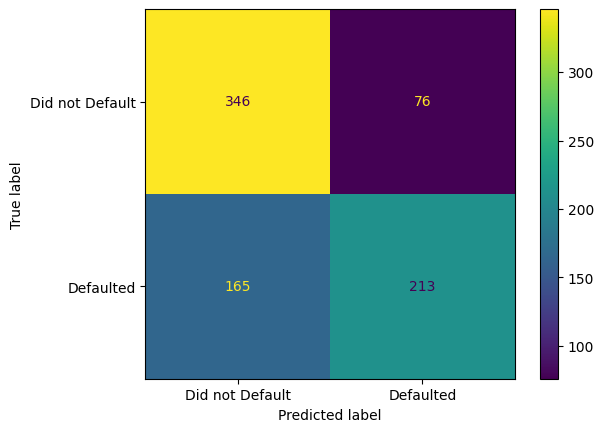

In [23]:
#Confusion matrix plotting

ConfusionMatrixDisplay.from_estimator(model,x_test_scaled,y_test,display_labels=['Did not Default', 'Defaulted'], values_format='d')
plt.show()

In [24]:
#Improving the model by optimizing the parameters with cross validation and GridSearchCV

param_grid = [
    {'C' : [0.5,1,10,100],
     'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel' : ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(x_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


### Building, Evaluating, Drawing and Interpreting the final SVM


In [25]:
model = SVC(random_state=42, C=1, gamma='scale')
model.fit(x_train_scaled,y_train)

SVC(C=1, random_state=42)

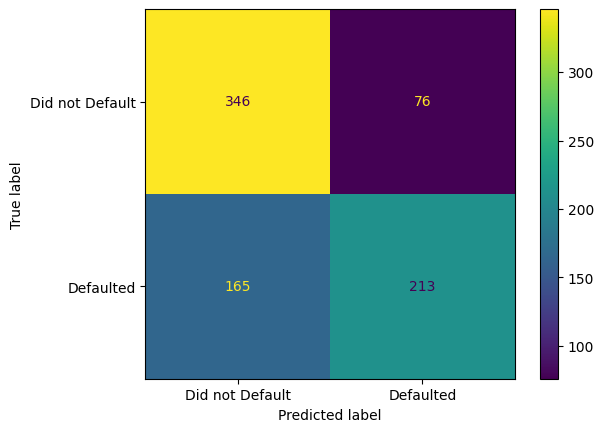

In [26]:
#Drawing another confusion matrix to envision the optimized SMV

ConfusionMatrixDisplay.from_estimator(model,x_test_scaled,y_test, values_format='d',display_labels=['Did not Default','Defaulted'])
plt.show()

The optimization did not help that much. 

### Getting the accuracy of the SVM model

In [28]:
y_predict = model.predict(x_test_scaled)

accuracy = accuracy_score(y_predict, y_test)
print(round(accuracy,2))



0.7


The model has an accuracy of 0.7, which is pretty decent. 

#### Conclusion

We can conclude that the model, despite being optimized using GridSearchCV and CrossValidation, did not improve in its functionality. Either way, I managed to obtain a naccuracy score of 0.7, which is decent, given the dataset that was used. 
Please feel free to contribute to this notebook as I would love more insights regarding the same. Thank you in advance. 